### Importing the Required Libraries

In [1]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Loading the dataset and viewing it

In [2]:
racoon_data = misc.face()
racoon_data[:5,:10]

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        [155, 146, 167],
        [155, 146, 167],
        [158, 148, 172],
        [159, 149, 173],
        [156, 146, 170],
        [147, 138, 159],
        [137, 128, 149]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        [137, 129, 150],
        [141, 133, 154],
        [148, 140, 163],
        [152, 144, 167],
        [151, 143, 166],
        [164, 156, 177],
        [154, 146, 167]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        [123, 115, 136],
        [127, 119, 140],
        [131, 123, 146],
        [132, 124, 147],
        [129, 121, 144],
        [139, 131, 152],
        [135, 127, 148]],

       [[ 81,  77,  94],
        [ 97,  93, 110],
        [113, 109, 126],
        [120, 115, 135],
        [125, 120, 140],
        [126, 121, 143],
        [120, 115, 137],
        [111, 106, 128],
        [101,  96, 116],
        [101,  96, 

### Checking for some meta data

In [3]:
racoon_data.shape

(768, 1024, 3)

### Plotting the Original Image

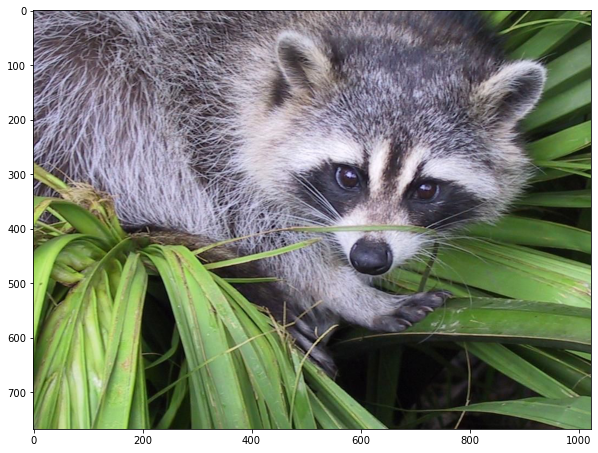

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(racoon_data)
plt.savefig(f'Image_Original.png')

### Transforming the 3D Data into 2D Data

In [5]:
trans_data = racoon_data.reshape(racoon_data.shape[0] * racoon_data.shape[1], racoon_data.shape[2])

### Clustering and Saving the Compressed Image

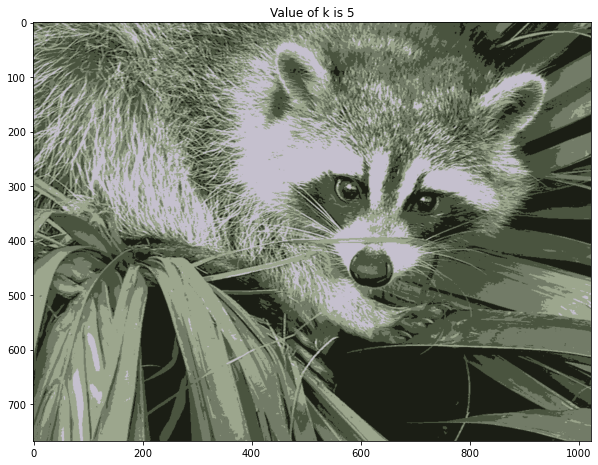

In [6]:
inertia_dict = {}

for k in [5]:
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(trans_data)

    cluster_data = np.expand_dims(kmeans.cluster_centers_.astype('int'), axis=0)
    data = []

    for i in kmeans.labels_:
        data.append(cluster_data[0,:,:][i])

    new_data = np.array(data).reshape(racoon_data.shape)
    plt.figure(figsize=(10,10))
    plt.imshow(new_data)
    plt.title(f'Value of k is {k}')
    plt.show()
    
    inertia_dict[k] = kmeans.inertia_
    

### Plotting the original image vs the compressed image

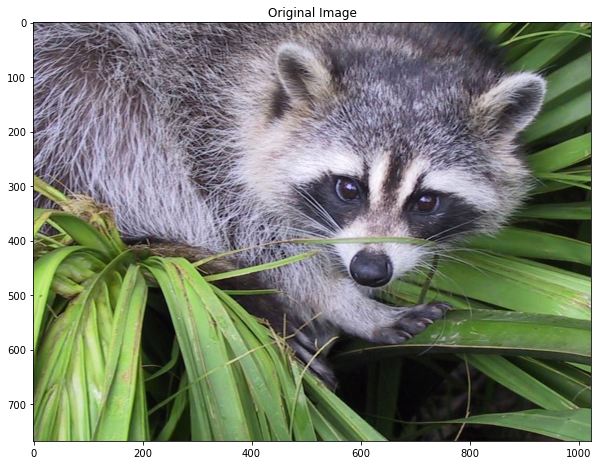

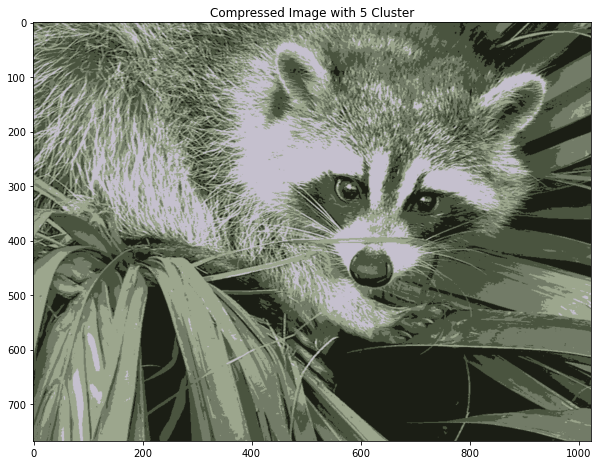

In [7]:
plt.figure(figsize=(10,10))
plt.title('Original Image')
plt.imshow(racoon_data)           
plt.show()

plt.figure(figsize=(10,10))
plt.title('Compressed Image with 5 Cluster')
plt.imshow(new_data)
plt.show()